In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('AAPL.csv')
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
1,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2,2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
3,2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
4,2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,13.020121


In [3]:
df.shape

(2347, 7)

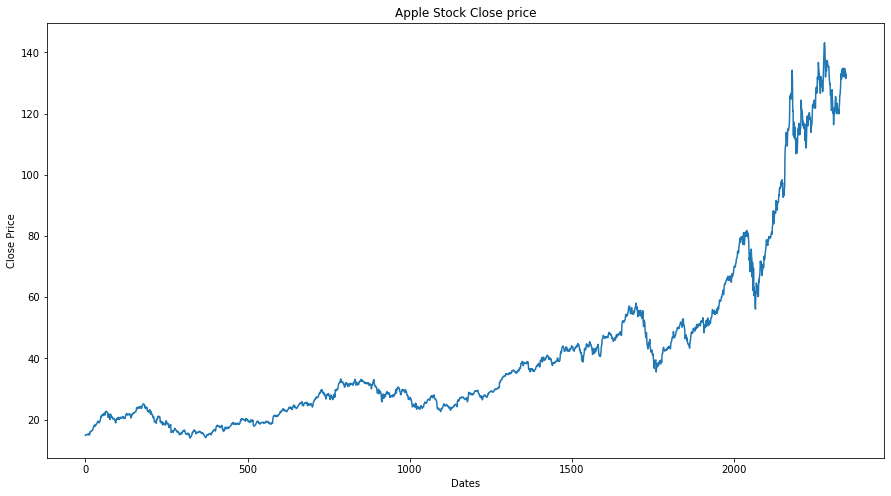

In [4]:
plt.figure(figsize=(15,8))
plt.title('Apple Stock Close price')
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [5]:
df=df[['Close']]

In [6]:
df

,Close
0,14.765714
1,14.929643
2,15.085714
3,15.061786
4,15.115714
...,...
2342,134.389999
2343,133.580002
2344,133.479996
2345,131.460007


In [7]:
future_days = 100

In [8]:
df['Predicted']=df['Close'].shift(-future_days)

In [9]:
df.tail()

,Close,Predicted
2342,134.389999,NaN
2343,133.580002,NaN
2344,133.479996,NaN
2345,131.460007,NaN
2346,132.539993,NaN


In [10]:
X=np.array(df.drop(['Predicted'],1))[:-future_days]

In [11]:
X

array([[ 14.76571369],
       [ 14.92964268],
       [ 15.08571434],
       ...,
       [122.94000244],
       [122.25      ],
       [123.75      ]])

In [12]:
 # create the target 

In [13]:
y=np.array(df['Predicted'])[:-future_days]
print(y)

[ 20.43821335  20.68464279  20.63321495 ... 133.47999573 131.46000671
 132.53999329]


In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [15]:
tree=DecisionTreeRegressor().fit(x_train, y_train)

In [16]:
lr=LinearRegression().fit(x_train, y_train)

In [17]:
x_future = df.drop(['Predicted'],1)[:-future_days]

In [18]:
x_future = x_future.tail(future_days)

In [19]:
x_future = np.array(x_future)

In [20]:
x_future

array([[ 96.32749939],
       [ 98.35749817],
       [ 97.        ],
       [ 97.27249908],
       [ 92.84500122],
       [ 92.61499786],
       [ 94.80999756],
       [ 93.25250244],
       [ 95.04000092],
       [ 96.19000244],
       [106.26000214],
       [108.9375    ],
       [109.66500092],
       [110.0625    ],
       [113.90249634],
       [111.11250305],
       [112.72750092],
       [109.375     ],
       [113.01000214],
       [115.01000214],
       [114.90750122],
       [114.60749817],
       [115.5625    ],
       [115.70749664],
       [118.27500153],
       [124.37000275],
       [125.85749817],
       [124.82499695],
       [126.52249908],
       [125.01000214],
       [124.80750275],
       [129.03999329],
       [134.17999268],
       [131.3999939 ],
       [120.87999725],
       [120.95999908],
       [112.81999969],
       [117.31999969],
       [113.48999786],
       [112.        ],
       [115.36000061],
       [115.54000092],
       [112.12999725],
       [110

In [21]:
tree_prediction=tree.predict(x_future)

In [22]:
print(tree_prediction)

[128.22999573 122.25       122.94000244 122.41000366 121.77999878
 127.87999725 126.66000366 128.69999695 126.66000366 128.22999573
 131.88000488 121.20999908 131.97000122 136.69000244 134.86999512
 133.72000122 132.69000244 129.41000366 131.00999451 126.59999847
 130.91999817 132.05000305 128.97999573 128.80000305 130.88999939
 128.91000366 127.13999939 139.07000732 132.02999878 136.86999512
 139.07000732 142.05999756 143.16000366 142.05999756 121.95999908
 121.08999634 132.69000244 134.99000549 133.94000244 137.38999939
 136.75999451 136.91000366 136.00999451 135.38999939 130.83999634
 135.36999512 137.38999939 130.83999634 129.71000671 129.86999512
 122.15000153 125.86000061 120.52999878 120.98999786 121.26000214
 127.79000092 125.12000275 123.38999939 120.12999725 120.98999786
 128.91000366 121.08999634 119.98000336 121.95999908 121.02999878
 123.98999786 125.56999969 120.98999786 120.52999878 119.98999786
 123.38999939 134.32000732 120.08999634 120.58999634 121.20999908
 121.38999

In [23]:
lr_prediction=lr.predict(x_future)

In [24]:
print(lr_prediction)

[113.08347782 115.52901748 113.89363935 114.22191901 108.88811205
 108.61102699 111.25534327 109.3790288  111.53242832 112.91783524
 125.04916451 128.27474636 129.15116676 129.63003393 134.25607776
 130.89497267 132.8405607  128.80180263 133.18088994 135.59029007
 135.46680721 135.10539351 136.25588428 136.43056174 139.52363504
 146.8662834  148.65826923 147.41441494 149.45939587 147.6372907
 147.39333968 152.4922213  158.68437889 155.33531419 142.66187356
 142.75825177 132.95199399 138.37314427 133.75914082 131.9641403
 136.01193325 136.22877963 132.120748   129.96433378 125.74788356
 129.65111839 131.73524435 126.0852073  127.41037553 132.30145485
 135.53005139 134.48195902 136.5540446  137.73465471 133.19293032
 137.38529059 133.36159679 135.6746187  135.54210096 137.95150109
 146.90242293 142.92690904 143.03533683 142.45707675 140.42113071
 136.7588506  138.60204023 137.83103292 136.48176554 135.6264296
 135.63847917 137.50575876 131.00037657 135.96374415 128.18138284
 128.07295505

In [25]:
pred = tree_prediction
valid=df[X.shape[0]:]
valid['prediction']=pred

<ipython-input-25-dec12ec46925>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=pred


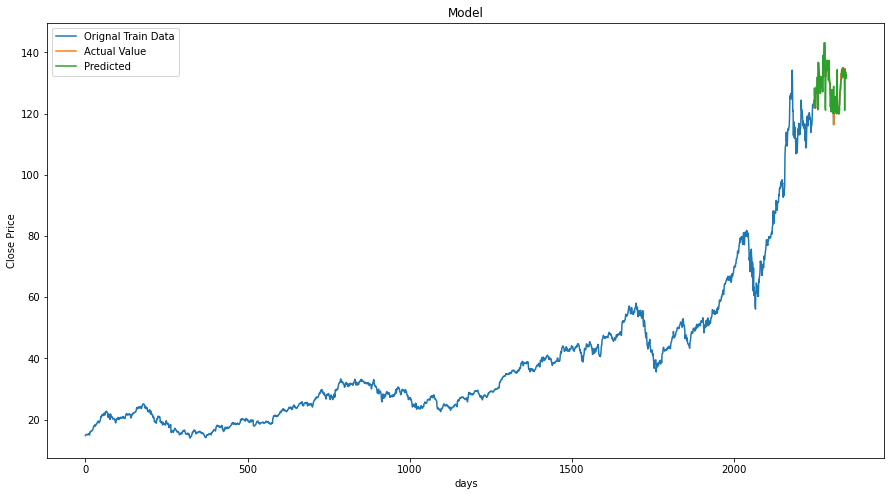

In [26]:
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orignal Train Data','Actual Value','Predicted'])


<ipython-input-27-6f313ae64f49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=pred


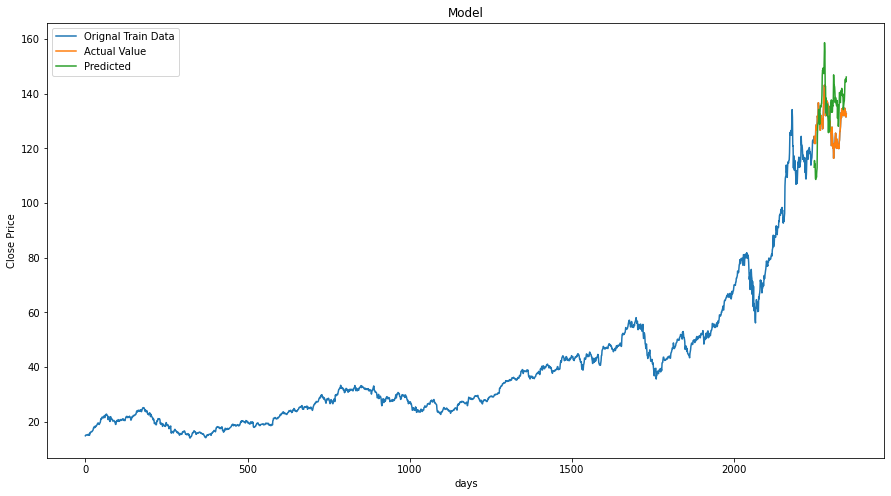

In [27]:
pred = lr_prediction
valid=df[X.shape[0]:]
valid['prediction']=pred
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Orignal Train Data','Actual Value','Predicted'])

In [28]:
from sklearn import metrics
print('R-Square Error:', metrics.r2_score(valid['Close'] , valid['prediction']))
print('Mean Absolute Error:', metrics.mean_absolute_error(valid['Close'] , valid['prediction']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(valid['Close'] , valid['prediction'])))
print('Mean Squared Error:', metrics.mean_squared_error(valid['Close'] , valid['prediction']))

R-Square Error: -2.7805871640291135
Mean Absolute Error: 9.816968852713654
Root Mean Squared Error: 11.548885280230023
Mean Squared Error: 133.37675121591369


<ipython-input-34-49a8d38b9e23>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=pred


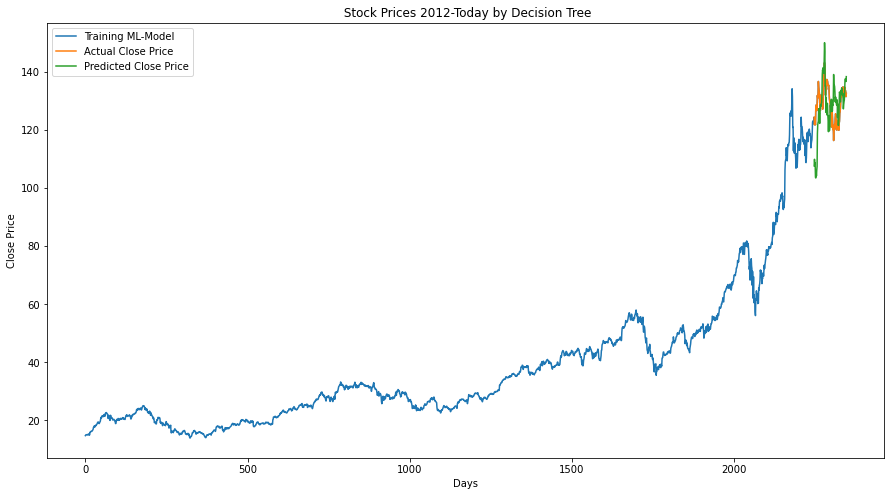

In [34]:
from sklearn.svm import SVR
SVregressor = SVR(kernel='linear')
SVregressor.fit(x_train, y_train)
x_future = df.drop(['Predicted'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
lr_prediction=SVregressor.predict(x_future)
pred = lr_prediction
valid=df[X.shape[0]:]
valid['prediction']=pred
plt.figure(figsize=(15,8))
plt.title(' Stock Prices 2012-Today by Decision Tree')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Training ML-Model','Actual Close Price','Predicted Close Price'])